In [7]:
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
import tifffile as tiff
import numpy as np

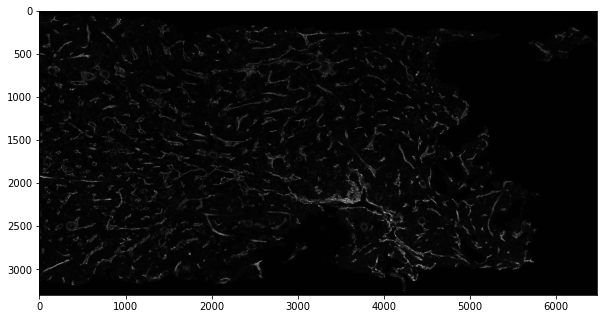

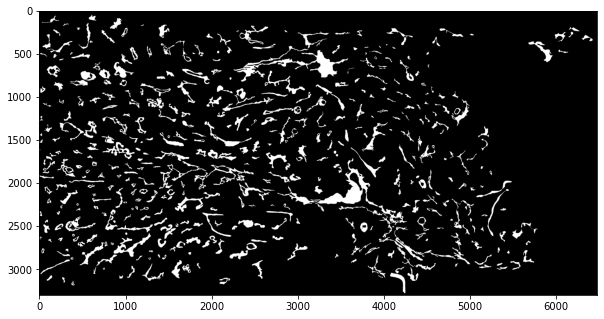

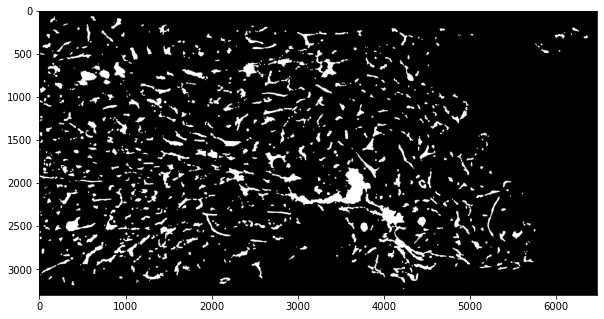

In [13]:
image = tiff.imread("/home/dkermany/data/Bone_Project/5-channel-data/452-Ves-Ki67-GFP-Reparing Front-Bone Surface.tif")[2]
label = cv2.imread("/home/dkermany/data/Bone_Project/5-channel-data/452-Ves-Vessels.png", 0)
traditional = cv2.imread("/home/dkermany/data/Bone_Project/5-channel-data/traditional/vessel-removesmall-traditional.png", 0)

plt.figure(figsize=(10,10))
plt.imshow(image, cmap="gray")
                    
plt.figure(figsize=(10,10))
plt.imshow(label, cmap="gray")

plt.figure(figsize=(10,10))
plt.imshow(traditional, cmap="gray")

In [9]:
def iou(outputs, labels):
    SMOOTH = 1e-6
    
#     print("outputs",torch.unique(outputs))
#     print("labels",torch.unique(labels))
    
    intersection = (outputs & labels).sum((0,1))
    union = (outputs | labels).sum((0,1))
#     print(intersection, union)
    
    iou = (intersection + SMOOTH) / (union + SMOOTH)
    
#     thresholded = np.ceil(np.clip(20 * (iou - 0.5), 0, 10)) / 10
    
    return iou

In [10]:
print(label.dtype, traditional.dtype)

uint8 uint8


In [11]:
print(iou((traditional*255).astype("uint8"), label))

0.6027767637287957


In [12]:
np.unique(traditional*255).astype("uint8")

array([0, 1], dtype=uint8)